# Correlaciones

In [ ]:
!pip install pingouin

In [12]:
import pandas as pd
import seaborn as sns
import pingouin as pg
from scipy import stats

## Cargar datos

In [1]:
import pandas as pd

df = pd.read_csv(
    "https://raw.githubusercontent.com/gastonstat/matrix4sl/master/data/starwars.csv"
)
df

,name,gender,height,weight,eyecolor,haircolor,skincolor,homeland,born,died,jedi,species,weapon
0,Anakin Skywalker,male,1.88,84.0,blue,blond,fair,Tatooine,41.9BBY,4ABY,yes_jedi,human,lightsaber
1,Padme Amidala,female,1.65,45.0,brown,brown,light,Naboo,46BBY,19BBY,no_jedi,human,unarmed
2,Luke Skywalker,male,1.72,77.0,blue,blond,fair,Tatooine,19BBY,unk_died,yes_jedi,human,lightsaber
3,Leia Organa,female,1.50,49.0,brown,brown,light,Alderaan,19BBY,unk_died,no_jedi,human,blaster
4,Qui-Gon Jinn,male,1.93,88.5,blue,brown,light,unk_planet,92BBY,32BBY,yes_jedi,human,lightsaber
5,Obi-Wan Kenobi,male,1.82,77.0,bluegray,auburn,fair,Stewjon,57BBY,0BBY,yes_jedi,human,lightsaber
6,Han Solo,male,1.80,80.0,brown,brown,light,Corellia,29BBY,unk_died,no_jedi,human,blaster
7,Sheev Palpatine,male,1.73,75.0,blue,red,pale,Naboo,82BBY,10ABY,no_jedi,human,force-lightning
8,R2-D2,male,0.96,32.0,NaN,NaN,NaN,Naboo,33BBY,unk_died,no_jedi,droid,unarmed
9,C-3PO,male,1.67,75.0,NaN,NaN,NaN,Tatooine,112BBY,3ABY,no_jedi,droid,unarmed


## Gráfico de dispersión

<Axes: xlabel='weight', ylabel='height'>

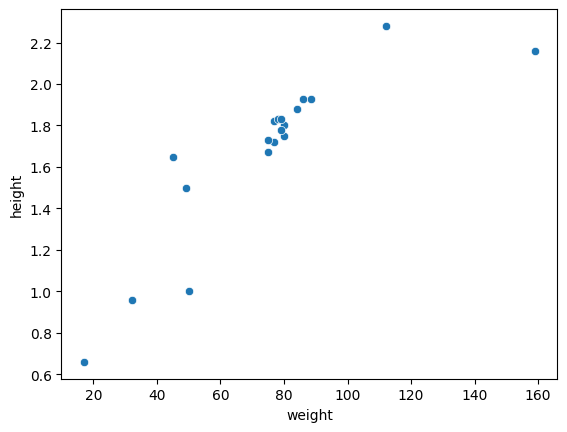

In [4]:
sns.scatterplot(x="weight", y="height", data=df)

## Coeficiente de correlación

In [9]:
pg.pairwise_corr(columns=["weight", "height"], data=df, method="pearson")

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,weight,height,pearson,two-sided,19,0.853301,"[0.65, 0.94]",0.000003,5933.741,0.999315


In [25]:
pg.pairwise_corr(columns=["weight", "height"], data=df, method="kendall")

,X,Y,method,alternative,n,r,CI95%,p-unc,power
0,weight,height,kendall,two-sided,19,0.815491,"[0.57, 0.93]",0.000002,0.9965


## Correlación biserial-puntual

<Axes: xlabel='gender', ylabel='height'>

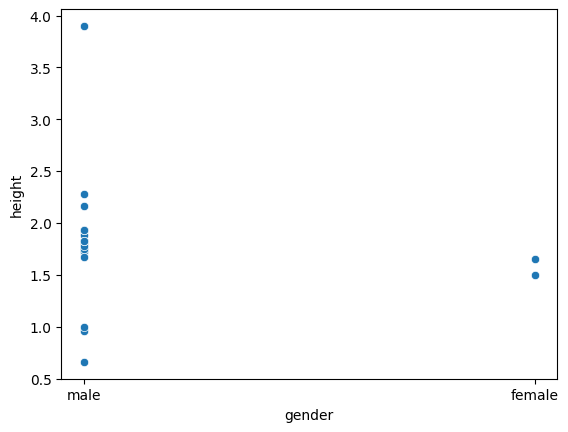

In [11]:
sns.scatterplot(x="gender", y="height", data=df)

In [22]:
gender = df["gender"].apply(lambda x: x in {"male"})
height = df["height"]

stats.pointbiserialr(gender, height)

SignificanceResult(statistic=0.11572723607949695, pvalue=0.6270655153480009)

## Chi-cuadrado

In [27]:
expected, observed, stats = pg.chi2_independence(x="jedi", y="gender", data=df)

/home/renato/.virtualenvs/gifted/lib/python3.10/site-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/home/renato/.virtualenvs/gifted/lib/python3.10/site-packages/pingouin/contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn(f"Low count on {name} frequencies.")


In [29]:
observed

gender,female,male
jedi,,
no_jedi,1.5,12.5
yes_jedi,0.5,5.5


In [28]:
expected

gender,female,male
jedi,,
no_jedi,1.4,12.6
yes_jedi,0.6,5.4
